## **CSC 4040 - Flu Shot Learning**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

Data Preparation, Exploration



In [ ]:
training_set_features = pd.read_csv("training_set_features.csv", index_col="respondent_id")
test_set_features = pd.read_csv("test_set_features.csv", index_col="respondent_id")
training_set_labels = pd.read_csv("training_set_labels.csv", index_col="respondent_id") 
train_set = training_set_labels
frames= [training_set_features, train_set]
train_data = pd.concat(frames, axis=1)


In [ ]:
training_set_features.isnull().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [ ]:
categorical_cols = train_data.select_dtypes(include='object').columns
train_data[categorical_cols].head()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,NaN,NaN
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",NaN,NaN
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb


Data Visualization - Bar plot and Heatmaps

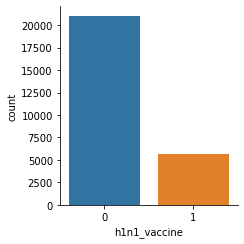

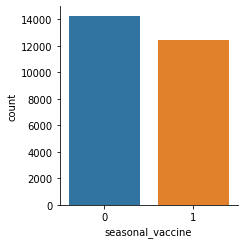

In [ ]:
sns.factorplot('h1n1_vaccine', data=training_set_labels, kind='count', size=3.5)
sns.factorplot('seasonal_vaccine', data=training_set_labels, kind='count', size=3.5)

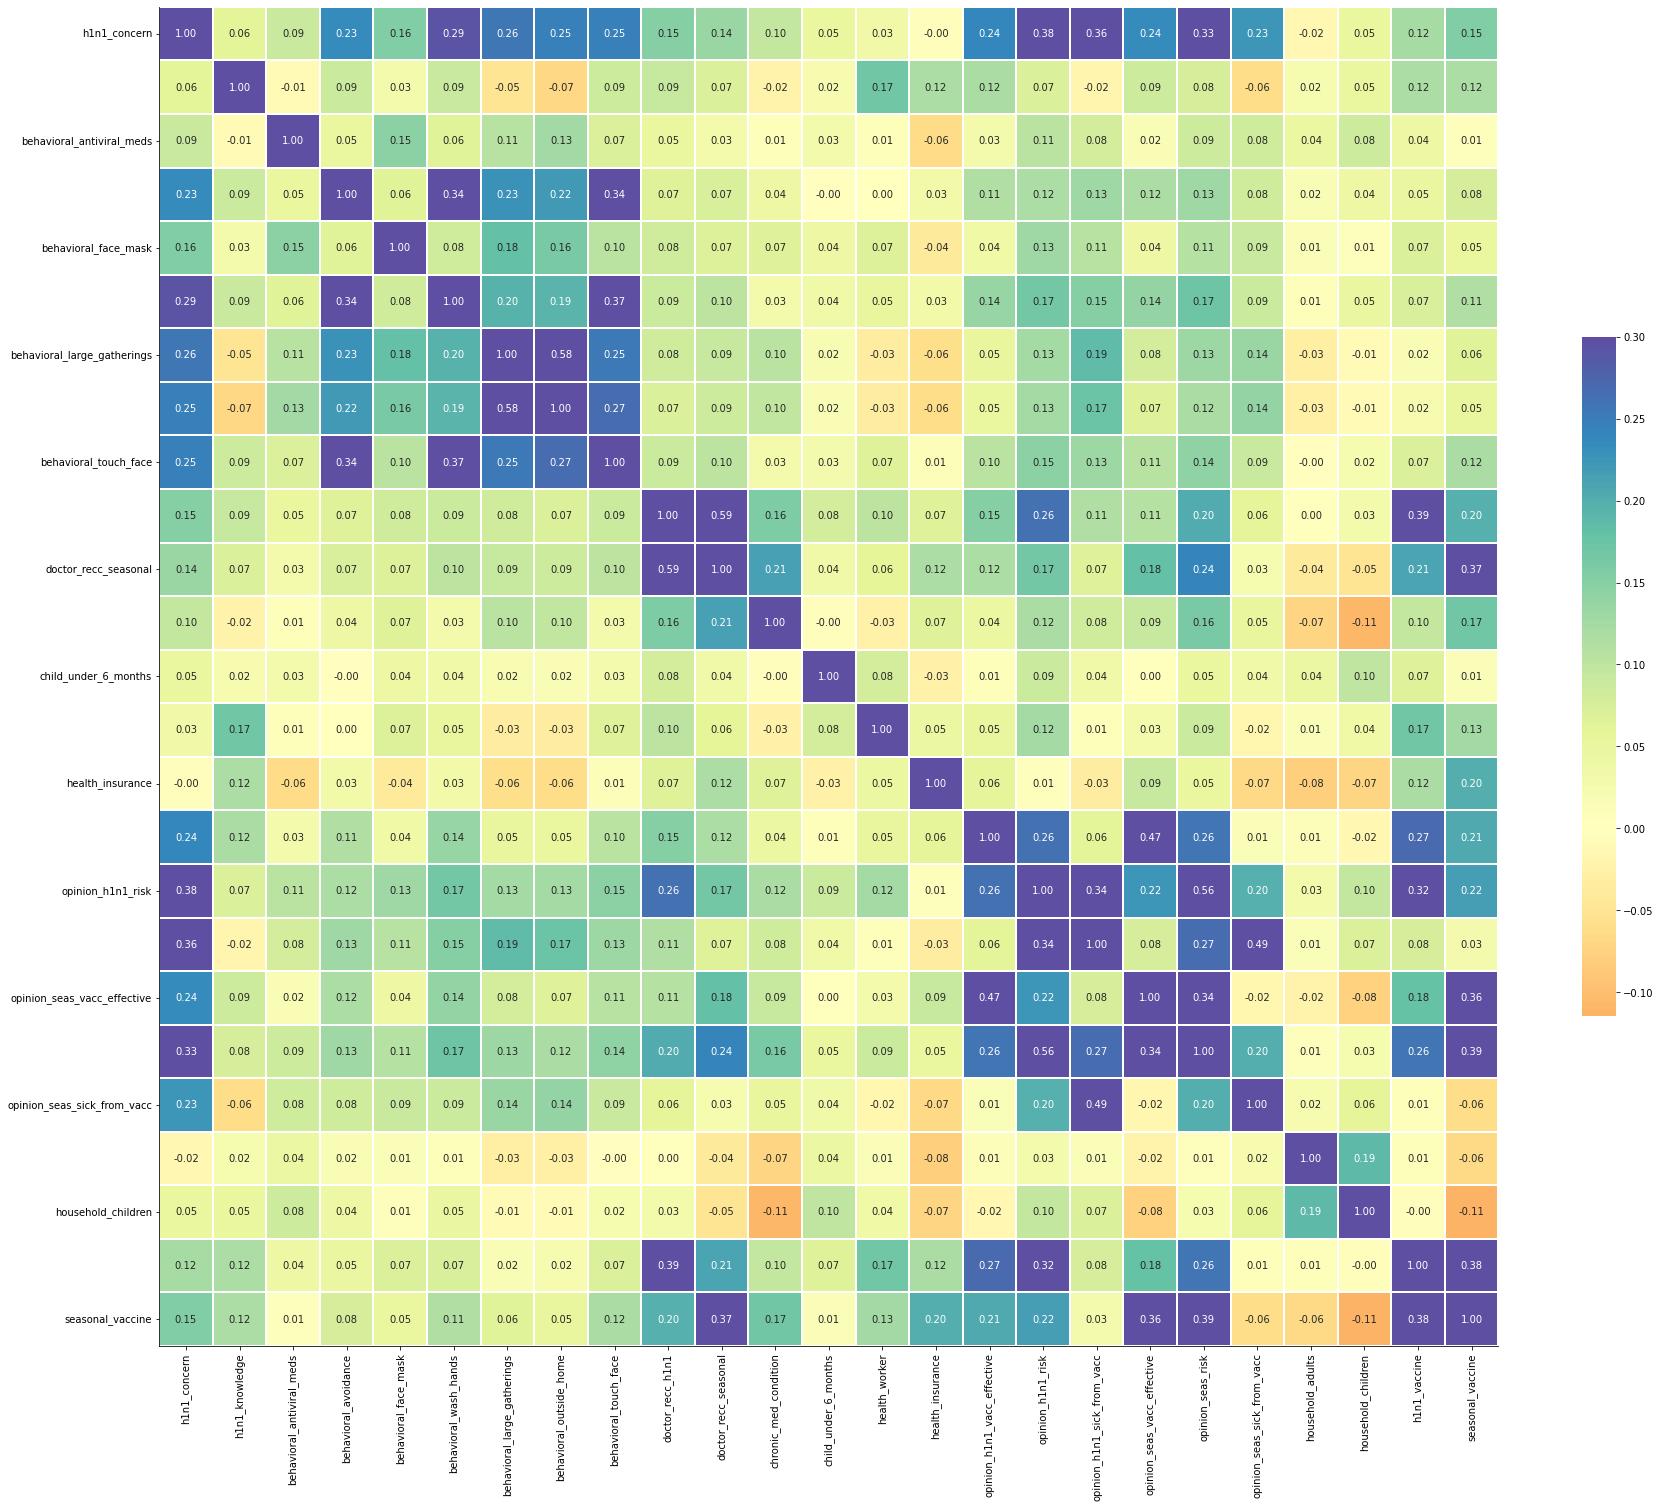

In [ ]:
correlation_map = train_data.corr()

g = sns.heatmap(correlation_map, vmax=0.3, center=0,square=True, linewidths=1, cbar_kws={"shrink":.5},
                annot=True, fmt='.2f', cmap='Spectral')
sns.despine()
g.figure.set_size_inches(30,25)
plt.show()

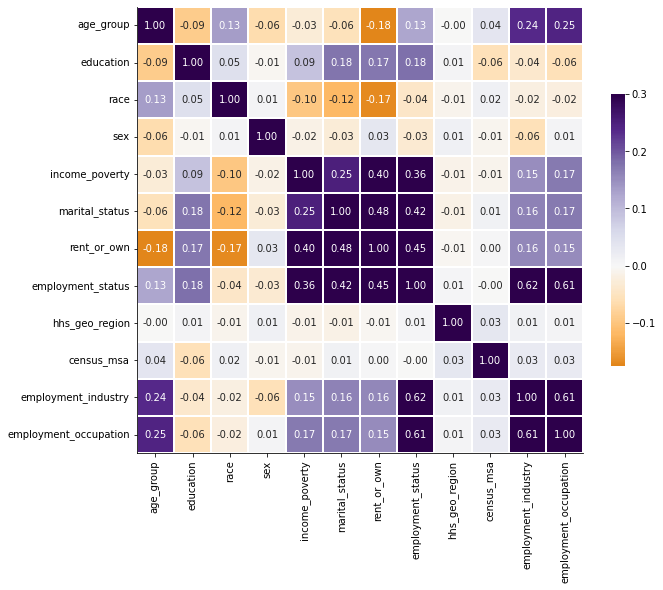

In [ ]:
encoder = LabelEncoder()
for col in categorical_cols:
  train_data[col] = encoder.fit_transform(train_data[col])

  
cat_dat = train_data[categorical_cols]
corr  = cat_dat.corr()

g = sns.heatmap(corr, vmax=.3,center=0,square=True, linewidths=1,cbar_kws={"shrink":.5}, annot=True,
                fmt='.2f', cmap='PuOr')
sns.despine()
g.figure.set_size_inches(10,10)

plt.show()

Feature Extraction - Dropping features with less value

In [ ]:
training_set_features = training_set_features.drop(['race','child_under_6_months','opinion_h1n1_sick_from_vacc','opinion_seas_sick_from_vacc','household_adults','behavioral_antiviral_meds','behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_antiviral_meds','marital_status',
           'behavioral_avoidance','behavioral_face_mask','income_poverty','hhs_geo_region','employment_status','education','census_msa'],axis=1)

test_set_features = test_set_features.drop(['race','child_under_6_months','opinion_h1n1_sick_from_vacc','opinion_seas_sick_from_vacc','household_adults','behavioral_antiviral_meds','behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_antiviral_meds','marital_status',
           'behavioral_avoidance','behavioral_face_mask','income_poverty','hhs_geo_region','employment_status','education','census_msa'],axis=1)

In [ ]:
numeric_cols = training_set_features.columns[training_set_features.dtypes != 'object'].values
non_numeric_cols = training_set_features.columns[training_set_features.dtypes == 'object'].values
print(numeric_cols)
print(non_numeric_cols)

['h1n1_concern' 'h1n1_knowledge' 'behavioral_wash_hands'
 'behavioral_touch_face' 'doctor_recc_h1n1' 'doctor_recc_seasonal'
 'chronic_med_condition' 'health_worker' 'health_insurance'
 'opinion_h1n1_vacc_effective' 'opinion_h1n1_risk'
 'opinion_seas_vacc_effective' 'opinion_seas_risk' 'household_children']
['age_group' 'sex' 'rent_or_own' 'employment_industry'
 'employment_occupation']


Data Preprocessing - Categorial and Numeric Data

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy = 'mean'))
])

non_numeric_preprocessing_steps = Pipeline([
     ('simple_imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('one_hot_encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers = [
        ('numeric', numeric_preprocessing_steps, numeric_cols),
        ('non_numeric', non_numeric_preprocessing_steps, non_numeric_cols)  
    ],
    remainder = "drop"
)

Training Data - Test/Train Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_eval, y_train, y_eval = train_test_split(
    training_set_features,
    training_set_labels,
    test_size=0.3,
    shuffle=True
)

Evaluation Models

In [ ]:
from sklearn import naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


estimators = MultiOutputClassifier(
     estimator=naive_bayes.BernoulliNB()
)
estimator_LR = MultiOutputClassifier(
     estimator=LogisticRegression(penalty="l2", C=1)
)

full_pipeline_LR = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimator_LR),
])

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

full_pipeline.fit(X_train, y_train)
full_pipeline_LR.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer())]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_wash_hands',
       'behavioral_touch_face', 'doctor_recc_h1n1',
       'doctor_recc_seasonal', 'chronic_med_condition', 'health_worker',
       'health_insuranc...
       'opinion_seas_risk', 'household_children'], dtype=object)),
                                                 ('non_numeric',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImpu

In [ ]:
predictions = full_pipeline.predict_proba(X_eval)

y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": predictions[0][:, 1],
        "seasonal_vaccine": predictions[1][:, 1],
    },
    index = y_eval.index
)

In [ ]:
estimator_DT = MultiOutputClassifier(
    estimator = DecisionTreeClassifier(criterion= 'gini', max_depth= 9, 
                                     max_features= 9, min_samples_leaf= 9, random_state = 123)
)

full_pipeline_DT = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimator_DT)                         
])

full_pipeline_DT.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer())]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_wash_hands',
       'behavioral_touch_face', 'doctor_recc_h1n1',
       'doctor_recc_seasonal', 'chronic_med_condition', 'health_worker',
       'health_insuranc...
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
  

In [ ]:
estimator_rf = MultiOutputClassifier(
    estimator = RandomForestClassifier(min_samples_leaf= 4, 
                            max_depth= 19, random_state=123, n_jobs=-1)
)

full_pipeline_rf = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimator_rf)                         
])

full_pipeline_rf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer())]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_wash_hands',
       'behavioral_touch_face', 'doctor_recc_h1n1',
       'doctor_recc_seasonal', 'chronic_med_condition', 'health_worker',
       'health_insuranc...
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
  

In [ ]:
estimator_knn = MultiOutputClassifier(
    estimator = KNeighborsClassifier(n_neighbors=35)
)

full_pipeline_knn = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimator_knn)                         
])

full_pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer())]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_wash_hands',
       'behavioral_touch_face', 'doctor_recc_h1n1',
       'doctor_recc_seasonal', 'chronic_med_condition', 'health_worker',
       'health_insuranc...
       'opinion_seas_risk', 'household_children'], dtype=object)),
                                                 ('non_numeric',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImpu

In [ ]:
from sklearn import svm

estimator_svm = MultiOutputClassifier(
    estimator = svm.SVC(probability=True)
)

full_pipeline_svm = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimator_svm)                         
])

full_pipeline_svm.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer())]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_wash_hands',
       'behavioral_touch_face', 'doctor_recc_h1n1',
       'doctor_recc_seasonal', 'chronic_med_condition', 'health_worker',
       'health_insuranc...
       'opinion_seas_risk', 'household_children'], dtype=object)),
                                                 ('non_numeric',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImpu

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

estimator_gbc = MultiOutputClassifier(
    estimator = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1, random_state=0)
)

full_pipeline_gbc = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimator_gbc)                         
])

full_pipeline_gbc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer())]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_wash_hands',
       'behavioral_touch_face', 'doctor_recc_h1n1',
       'doctor_recc_seasonal', 'chronic_med_condition', 'health_worker',
       'health_insuranc...
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
  

Model Evaluation/Scores

In [ ]:
from sklearn.metrics import roc_auc_score

predict_LR = full_pipeline_LR.predict_proba(X_eval) 
predict_DT = full_pipeline_DT.predict_proba(X_eval) 
predict_rf = full_pipeline_rf.predict_proba(X_eval) 
predict_knn = full_pipeline_knn.predict_proba(X_eval)
predict_svm = full_pipeline_svm.predict_proba(X_eval)
predict_gbc = full_pipeline_gbc.predict_proba(X_eval)


y_preds_LR = pd.DataFrame( { "h1n1_vaccine": predict_LR[0][:, 1], "seasonal_vaccine": predict_LR[1][:, 1], }, index = y_eval.index )

y_preds_DT = pd.DataFrame( { "h1n1_vaccine": predict_DT[0][:, 1], "seasonal_vaccine": predict_DT[1][:, 1], }, index = y_eval.index )

y_preds_rf = pd.DataFrame( { "h1n1_vaccine": predict_rf[0][:, 1], "seasonal_vaccine": predict_rf[1][:, 1], }, index = y_eval.index )

y_preds_knn = pd.DataFrame( { "h1n1_vaccine": predict_knn[0][:, 1], "seasonal_vaccine": predict_knn[1][:, 1], }, index = y_eval.index )
y_preds_svm = pd.DataFrame( { "h1n1_vaccine": predict_svm[0][:, 1], "seasonal_vaccine": predict_svm[1][:, 1], }, index = y_eval.index )

y_preds_gbc = pd.DataFrame({"h1n1_vaccine": predict_gbc[0][:,1], "seasonal_vaccine": predict_gbc[1][:,1],}, index = y_eval.index)







print('ROC/AUC Score of Naive Bayes: %.4f'% roc_auc_score(y_eval, y_preds)) 
print('ROC/AUC Score of Logistic Regression: %.4f'% roc_auc_score(y_eval, y_preds_LR)) 
print('ROC/AUC Score of Decision Tree: %.4f'% roc_auc_score(y_eval, y_preds_DT)) 
print('ROC/AUC Score of Random Forest Tree: %.4f'% roc_auc_score(y_eval, y_preds_rf)) 
print('ROC/AUC Score of K Nearest Neighbors: %.4f'% roc_auc_score(y_eval, y_preds_knn))
print('ROC/AUC Score of SVM: %.4f'% roc_auc_score(y_eval, y_preds_svm))
print('ROC/AUC Score of Gradient Boosting Classifier: %.4f' % roc_auc_score(y_eval, y_preds_gbc))


ROC/AUC Score of Naive Bayes: 0.8013
ROC/AUC Score of Logistic Regression: 0.8349
ROC/AUC Score of Decision Tree: 0.7931
ROC/AUC Score of Random Forest Tree: 0.8549
ROC/AUC Score of K Nearest Neighbors: 0.8158
ROC/AUC Score of SVM: 0.8368
ROC/AUC Score of Gradient Boosting Classifier: 0.8536


In [ ]:
#Full pipeline prediction

full_pipeline_rf.fit(training_set_features, training_set_labels)
predic_gbs = full_pipeline_rf.predict_proba(test_set_features)

y_preds_full_gbc = pd.DataFrame({"h1n1_vaccine": predic_gbs[0][:,1], "seasonal_vaccine": predic_gbs[1][:,1],}, index = test_set_features.index)


print("y_preds1_h1n1.shape:", y_preds_full_gbc.shape)

y_preds_full_gbc.to_csv('Random Forest Classifier.csv', index=True)


y_preds1_h1n1.shape: (26708, 2)


Bar plot of the variation of scores

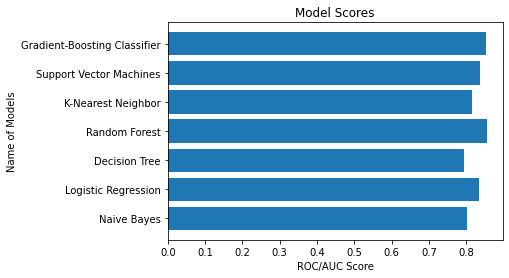

In [ ]:
n_bayes = roc_auc_score(y_eval, y_preds)
l_regres = roc_auc_score(y_eval, y_preds_LR)
dt_regres = roc_auc_score(y_eval, y_preds_DT)
rf_regres = roc_auc_score(y_eval, y_preds_rf)
knn_regres = roc_auc_score(y_eval, y_preds_knn)
svm_regres = roc_auc_score(y_eval, y_preds_svm)
gbc_regres = roc_auc_score(y_eval, y_preds_gbc)
data = [n_bayes, l_regres,dt_regres, rf_regres, knn_regres, svm_regres,gbc_regres]
labels = ['Naive Bayes', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbor', 'Support Vector Machines', 'Gradient-Boosting Classifier']

plt.barh(labels, data)
plt.ylabel('Name of Models')
plt.xlabel('ROC/AUC Score')
plt.title('Model Scores')
plt.show()